In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [5]:
red.shape

(1599, 12)

In [6]:
white.shape

(4898, 12)

In [7]:
red["Type"] = 0
white["Type"] = 1

In [10]:
wine = white.append(red, ignore_index=True)

In [11]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [20]:
x = wine.iloc[:, :12].values
y = wine.iloc[:, 12].values

In [21]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x = scaller.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
trainX, testX, trainY, testY = train_test_split(x,y, test_size = 0.3)

In [36]:
trainX.shape (25k, 234, 453, 3)

(4547, 12)

### Deep Learning Part

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(16, activation = "relu", input_shape=(12,)))

#outputLayer
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainX, trainY, epochs=20, validation_split = 0.3, batch_size=4547)

Epoch 1/20
1/1 [==============================] - 0s 164ms/step - loss: 0.6506 - accuracy: 0.6238 - val_loss: 0.6220 - val_accuracy: 0.6872
Epoch 2/20
1/1 [==============================] - 0s 82ms/step - loss: 0.6288 - accuracy: 0.6578 - val_loss: 0.6016 - val_accuracy: 0.7209
Epoch 3/20
1/1 [==============================] - 0s 114ms/step - loss: 0.6077 - accuracy: 0.6948 - val_loss: 0.5819 - val_accuracy: 0.7538
Epoch 4/20
1/1 [==============================] - 0s 102ms/step - loss: 0.5874 - accuracy: 0.7357 - val_loss: 0.5629 - val_accuracy: 0.7832
Epoch 5/20
1/1 [==============================] - 0s 97ms/step - loss: 0.5677 - accuracy: 0.7775 - val_loss: 0.5446 - val_accuracy: 0.8176
Epoch 6/20
1/1 [==============================] - 0s 113ms/step - loss: 0.5487 - accuracy: 0.8146 - val_loss: 0.5269 - val_accuracy: 0.8425
Epoch 7/20
1/1 [==============================] - 0s 101ms/step - loss: 0.5304 - accuracy: 0.8404 - val_loss: 0.5098 - val_accuracy: 0.8703
Epoch 8/20
1/1 [======

In [72]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 120)               1560      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 121       
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [71]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

In [73]:
tva = pd.DataFrame({
    "Ta":accuracy,
    "Va":val_accuracy
})

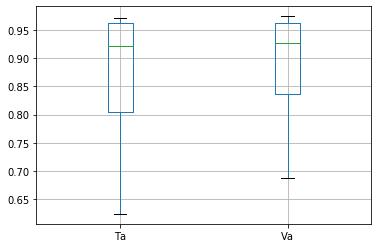

In [74]:
tva.boxplot()